In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("customer_data.csv")

### Zadanie

Na jednej zmiennej zidentyfikuj outliers wykorzystując:
- metoda Tukeya - zmień z 1.5IQR na 2IQR wyrysuj boxplot
- metoda Hampleta (MAD) - boxplot
- Z-score + zmodyfikowany

In [3]:
df["Fresh"].describe()

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

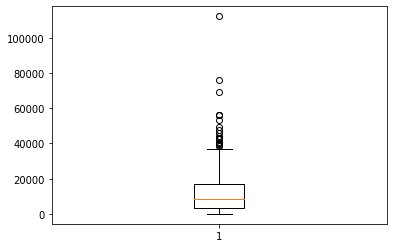

In [4]:
plt.boxplot(df['Fresh'], whis=1.5)
plt.show()

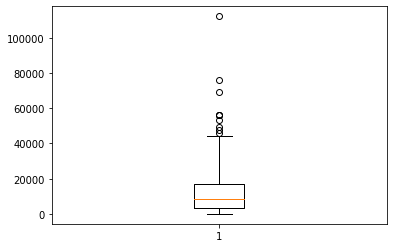

In [5]:
plt.boxplot(df['Fresh'], whis=2)
plt.show()

<AxesSubplot:xlabel='Fresh'>

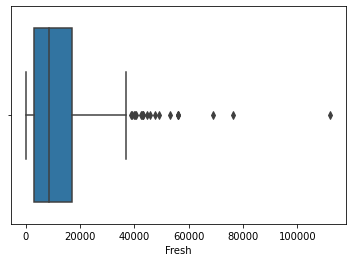

In [6]:
sns.boxplot(x=df["Fresh"],whis=1.5)

<AxesSubplot:xlabel='Fresh'>

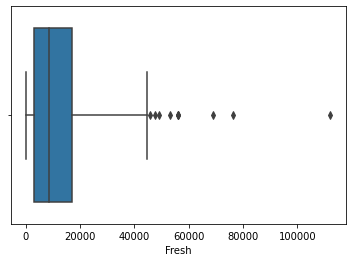

In [7]:
sns.boxplot(x=df["Fresh"],whis=2)

In [18]:
def outlier_detection_Hampel(column):
    sorted(column)
    med=np.percentile(column,50)
    List=abs(column-med)
    MAD=np.percentile(List,50)*1.4826
    lower_range=med - (3* MAD)
    upper_range= med + (3* MAD)
    return lower_range, upper_range

lowerbound, upperbound= outlier_detection_Hampel(df.Fresh)
df[(df.Fresh<lowerbound) | (df.Fresh > upperbound)]


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
29,1,3,43088,2100,2609,1200,1107,823
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
52,2,3,40721,3916,5876,532,2587,1278
61,2,3,35942,38369,59598,3254,26701,2017
87,1,3,43265,5025,8117,6312,1579,14351
103,1,3,56082,3504,8906,18028,1480,2498
124,1,3,36050,1642,2961,4787,500,1621
125,1,3,76237,3473,7102,16538,778,918
129,1,3,42312,926,1510,1718,410,1819
